<a href="https://colab.research.google.com/github/gremlin97/Detecting-and-refining-HiRISE-Image-Patches-Obscured-by-Atmospheric-Dust/blob/main/AtmosphericDustMars_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [2]:
%mkdir dataset
!cp '/content/drive/MyDrive/rdr_nomap_browse.zip' dataset/
%cd dataset

/content/dataset


In [3]:
!unzip -q rdr_nomap_browse.zip 
%cd rdr_nomap_browse

/content/dataset/rdr_nomap_browse


In [4]:
import os
import random
from skimage import io
from collections import Counter
import matplotlib as plt
import pandas as pd

path = '/content/dataset/rdr_nomap_browse'
data = '/content/dataset/rdr_nomap_browse/manifest.csv'
path_dusty = '/content/dataset/rdr_nomap_browse/dusty'
path_not_dusty = '/content/dataset/rdr_nomap_browse/not_dusty'

df = pd.read_csv(data)
os.listdir(path_dusty)
path

'/content/dataset/rdr_nomap_browse'

In [5]:
df.sample(10)

,#dataset,id,label
2864,train,008670_PSP_004390_1035_r3967_c1946,dusty
12622,validation,002662_ESP_013968_1020_r281_c1843,not_dusty
16461,test,009773_PSP_004336_1035_r3330_c1126,dusty
4704,train,002058_PSP_004424_1395_r16073_c1229,dusty
11507,validation,001594_PSP_004509_1890_r1505_c410,dusty
10715,validation,007553_PSP_004391_0990_r1549_c1638,dusty
6110,train,009165_ESP_012289_1840_r66_c1434,not_dusty
18464,test,001607_PSP_010338_2240_r282_c410,not_dusty
13084,validation,009950_PSP_001777_1650_r3975_c1946,not_dusty
2829,train,006630_PSP_004326_1525_r3969_c819,dusty


In [6]:
Xtrain_list = []
Xval_list = []
Xtest_list = []
Ytrain_list = []
Yval_list = []
Ytest_list = []
trainMap = {}
valMap = {}
testMap = {}

for i in df.index:
  if df['#dataset'][i] == 'train':
    Xtrain_list.append({'id':df['id'][i]})
    Ytrain_list.append({'label':df['label'][i]})
    trainMap[df['id'][i]] = df['label'][i]

  if df['#dataset'][i] == 'validation':
    Xval_list.append({'id':df['id'][i]})
    Yval_list.append({'label':df['label'][i]})
    valMap[df['id'][i]] = df['label'][i]

  if df['#dataset'][i] == 'test':
     Xtest_list.append({'id':df['id'][i]})
     Ytest_list.append({'label':df['label'][i]})
     testMap[df['id'][i]] = df['label'][i]

In [7]:
from skimage import io

Xtrain = []
Ytrain = []
Xval = []
Yval = []
Xtest = []
Ytest = []

curr_dir = os.getcwd()

for x in Xtrain_list:
  Xtrain.append(io.imread(curr_dir + '/' + trainMap[x['id']] + '/' + x['id'] + '.png'))
  Ytrain.append(trainMap[x['id']])

for x in Xval_list:
  Xval.append(io.imread(curr_dir + '/' + valMap[x['id']] + '/' + x['id'] + '.png'))
  Yval.append(valMap[x['id']])

for x in Xtest_list:
  Xtest.append(io.imread(curr_dir + '/' + testMap[x['id']] + '/' + x['id'] + '.png'))
  Ytest.append(testMap[x['id']])

In [8]:
from collections import Counter
print(Counter(Ytrain))
print(Counter(Yval))
print(Counter(Ytest))
print(len(Xtrain))
print(len(Xval))
print(len(Xtest))

Counter({'not_dusty': 4961, 'dusty': 4856})
Counter({'not_dusty': 2485, 'dusty': 2484})
Counter({'dusty': 2660, 'not_dusty': 2554})
9817
4969
5214


not_dusty


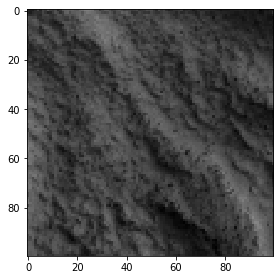

In [9]:
io.imshow(Xtrain[9100])
print(Ytrain[9100])

dusty


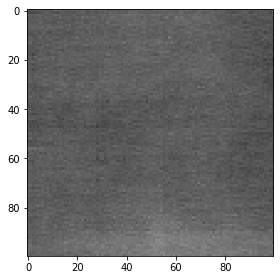

In [10]:
io.imshow(Xtrain[1100])
print(Ytrain[1100])

In [11]:
print(np.max(Xtrain)-np.min(Xtrain), np.max(Xtest)-np.min(Xtest), np.max(Xval)-np.min(Xval))

255 255 255


In [12]:
random.seed(32)
rand_trainzip = list(zip(Xtrain,Ytrain))
rand_valzip = list(zip(Xval,Yval))
rand_testzip = list(zip(Xtest,Ytest))
random.shuffle(rand_trainzip)
random.shuffle(rand_valzip)
random.shuffle(rand_testzip)
Xtrain, Ytrain = zip(*rand_trainzip)
Xval, Yval = zip(*rand_valzip)
Xtest, Ytest = zip(*rand_testzip)

In [13]:
norm = np.max(Xtrain)-np.min(Xtrain)
for x in Xtrain:
  x = x/norm

for x in Xtest:
  x = x/norm

for x in Xval:
  x = x/norm

dusty


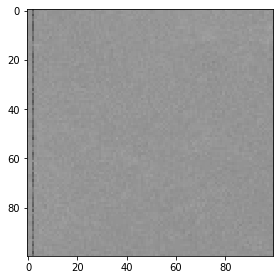

In [14]:
io.imshow(Xtrain[926])
print(Ytrain[926])

not_dusty


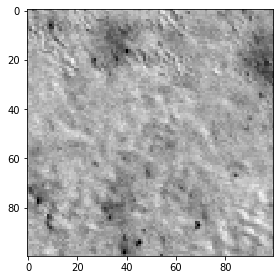

In [15]:
io.imshow(Xtrain[928])
print(Ytrain[928])

In [16]:
X_train = np.array(Xtrain)
Y_train = np.array(Ytrain)
X_val = np.array(Xval)
Y_val = np.array(Yval)
X_test = np.array(Xtest)
Y_test = np.array(Ytest)

In [17]:
TX_train = X_train 
TY_train = Y_train 
TX_val = X_val
TY_val = Y_val 
TX_test = X_test
TY_test = Y_test 

In [18]:
TX_train.shape

(9817, 100, 100)

In [19]:
from skimage.transform import resize

Xtrain_tf = []
Xtest_tf = []
Xval_tf = []
Xtrain_tf_rn = []
Xtest_tf_rn = []
Xval_tf_rn = []


for i in range(len(TX_train)):
  val = np.expand_dims(TX_train[i], axis=2)
  Xtrain_tf.append(resize(val, (64, 64, 1)))
  #Xtrain_tf_rn.append(resize(val, (224, 224, 1)))

for i in range(len(TX_test)):
  val = np.expand_dims(TX_test[i], axis=2)
  Xtest_tf.append(resize(val, (64, 64, 1)))
  #Xtest_tf_rn.append(resize(val, (224, 224, 1)))

for i in range(len(TX_val)):
  val = np.expand_dims(TX_val[i], axis=2)
  Xval_tf.append(resize(val, (64, 64, 1)))
  #Xval_tf_rn.append(resize(val, (224, 224, 1)))

Xtrain_tf = np.asarray(Xtrain_tf)
Xtest_tf = np.asarray(Xtest_tf)
Xval_tf = np.asarray(Xval_tf)

In [20]:
# from skimage.transform import resize

# Xtrain_tf = []
# Xtest_tf = []
# Xval_tf = []
# Xtrain_tf_rn = []
# Xtest_tf_rn = []
# Xval_tf_rn = []


# for i in range(len(TX_train)):
#   val = np.expand_dims(TX_train[i], axis=2)
#   #Xtrain_tf.append(resize(val, (64, 64, 1)))
#   Xtrain_tf_rn.append(resize(val, (224, 224, 1)))

# for i in range(len(TX_test)):
#   val = np.expand_dims(TX_test[i], axis=2)
#   #Xtest_tf.append(resize(val, (64, 64, 1)))
#   Xtest_tf_rn.append(resize(val, (224, 224, 1)))

# for i in range(len(TX_val)):
#   val = np.expand_dims(TX_val[i], axis=2)
#   #Xval_tf.append(resize(val, (64, 64, 1)))
#   Xval_tf_rn.append(resize(val, (224, 224, 1)))

# Xtrain_tf_rn = np.asarray(Xtrain_tf_rn)
# Xtrain_tf_rn = np.repeat(Xtrain_tf_rn[:, :, np.newaxis], 3, axis=2)
# Xtest_tf_rn = np.asarray(Xtest_tf_rn)
# Xtest_tf_rn = np.repeat(Xtest_tf_rn[:, :, np.newaxis], 3, axis=2)
# Xval_tf_rn = np.asarray(Xval_tf_rn)
# Xval_tf_rn = np.repeat(Xval_tf_rn[:, :, np.newaxis], 3, axis=2)

In [21]:
# del TY_test, TY_train, TY_val, X_test, X_train, X_val
# del TX_test, TX_train, TX_val
# Xtrain_tf_rn = np.asarray(Xtrain_tf_rn)
# Xtrain_tf_rn = np.repeat(Xtrain_tf_rn[:, :, np.newaxis], 3, axis=2)
# Xtest_tf_rn = np.asarray(Xtest_tf_rn)
# Xtest_tf_rn = np.repeat(Xtest_tf_rn[:, :, np.newaxis], 3, axis=2)
# Xval_tf_rn = np.asarray(Xval_tf_rn)
# Xval_tf_rn = np.repeat(Xval_tf_rn[:, :, np.newaxis], 3, axis=2)

In [22]:
# Xtrain_tf_rn.shape

In [23]:
Xtrain_tf.shape, Xtest_tf.shape, Xval_tf.shape

((9817, 64, 64, 1), (5214, 64, 64, 1), (4969, 64, 64, 1))

In [24]:
X_train = X_train.reshape(9817, 100*100)
X_val = X_val.reshape(4969, 100*100)
X_test = X_test.reshape(5214, 100*100)

In [25]:
# Dimensionality reduction using PCA. We initially use PCA to with 10 components
from sklearn.decomposition import PCA
n_components = 10
# Reducing our train data using PCA
pca = PCA(n_components=n_components,random_state=32).fit(X_train)

Text(0, 0.5, 'Fraction of Total Variance Explained')

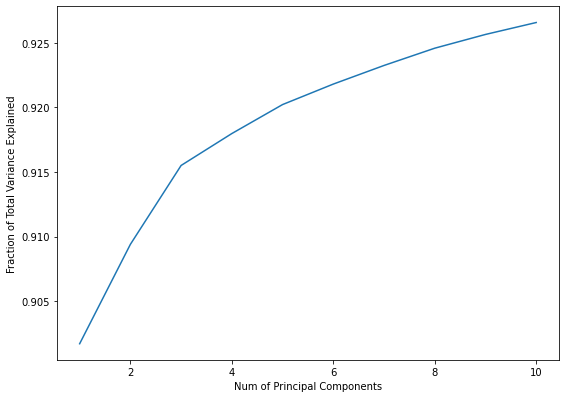

In [26]:
s = 0
l = []

for i in range (n_components):
  s+=pca.explained_variance_ratio_[i]
  l.append(s)

from matplotlib import pyplot as plt
plt.figure(figsize=(9,6.5))
x_data = list(range(1,11))
y_data = l
plt.plot(x_data, y_data)
plt.xlabel("Num of Principal Components")
plt.ylabel("Fraction of Total Variance Explained")

In [27]:
n_components = 3
# Reducing our train data using PCA
pca = PCA(n_components=n_components,random_state=32).fit(X_train)

In [28]:
X_train_pca = pca.transform(X_train)

In [29]:
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

In [30]:
X_train_pca.shape, len(X_train_pca)

((9817, 3), 9817)

In [31]:
for i in range(len(Y_train)):
  if Y_train[i] == 'dusty':
    Y_train[i] = 1
  else:
    Y_train[i] = 0

In [32]:
for i in range(len(Y_test)):
  if Y_test[i] == 'dusty':
    Y_test[i] = 1
  else:
    Y_test[i] = 0

In [33]:
for i in range(len(Y_val)):
  if Y_val[i] == 'dusty':
    Y_val[i] = 1
  else:
    Y_val[i] = 0

In [34]:
type(Y_val[0])

numpy.str_

In [35]:
Y_train = Y_train.astype(np.float64)
Y_test = Y_test.astype(np.float64)
Y_val = Y_val.astype(np.float64)

In [36]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# YOUR CODE HERE
C = 10000
svc = SVC(kernel='rbf', C=C)
svc.fit(X_train_pca, Y_train)

SVC(C=10000)

In [37]:
# YOUR CODE HERE
y_pred = svc.predict(X_test_pca)

In [38]:
print("Accuracy is:",accuracy_score(Y_test, y_pred))

Accuracy is: 0.6196777905638665


In [39]:
target_names = ['non_dusty','dusty']

In [40]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

   non_dusty       0.60      0.68      0.64      2554
       dusty       0.65      0.56      0.60      2660

    accuracy                           0.62      5214
   macro avg       0.62      0.62      0.62      5214
weighted avg       0.62      0.62      0.62      5214



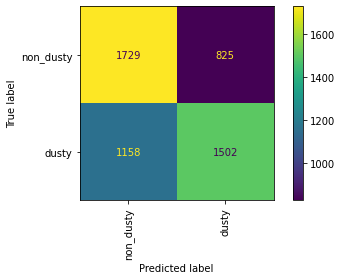

In [41]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(svc, X_test_pca, Y_test, display_labels=target_names, xticks_rotation="vertical")
plt.tight_layout()
plt.show()

In [42]:
Y_train

array([1., 0., 0., ..., 1., 1., 1.])

In [43]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [44]:
train_dataset = tf.data.Dataset.from_tensor_slices((Xtrain_tf, Y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((Xtest_tf, Y_test))
val_dataset = tf.data.Dataset.from_tensor_slices((Xval_tf, Y_val))

In [45]:
BATCH_SIZE = 64
SHUFFLE_BUFFER_SIZE = 100

train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)
val_dataset = val_dataset.batch(BATCH_SIZE)

In [46]:
train_dataset

<BatchDataset element_spec=(TensorSpec(shape=(None, 64, 64, 1), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [47]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [48]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

In [49]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 9216)              0

In [50]:
opt = tf.keras.optimizers.Adam(3e-4)

In [51]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(train_dataset, validation_data=val_dataset, epochs=10)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


154/154 [==============================] - 59s 378ms/step - loss: 0.5281 - accuracy: 0.7260 - val_loss: 0.4904 - val_accuracy: 0.7569
Epoch 2/10
154/154 [==============================] - 60s 388ms/step - loss: 0.4586 - accuracy: 0.7819 - val_loss: 0.4618 - val_accuracy: 0.7847
Epoch 3/10
154/154 [==============================] - 60s 388ms/step - loss: 0.4176 - accuracy: 0.8127 - val_loss: 0.4343 - val_accuracy: 0.8169
Epoch 4/10
154/154 [==============================] - 60s 393ms/step - loss: 0.3445 - accuracy: 0.8543 - val_loss: 0.3966 - val_accuracy: 0.8056
Epoch 5/10
154/154 [==============================] - 58s 379ms/step - loss: 0.3042 - accuracy: 0.8800 - val_loss: 0.2774 - val_accuracy: 0.8923
Epoch 6/10
154/154 [==============================] - 59s 380ms/step - loss: 0.2666 - accuracy: 0.8999 - val_loss: 0.3792 - val_accuracy: 0.8205
Epoch 7/10
154/154 [==============================] - 58s 379ms/step - loss: 0.2747 - accuracy: 0.8930 - val_loss: 0.3253 - val_accuracy: 0.8

In [52]:
model.evaluate(test_dataset)

82/82 [==============================] - 7s 90ms/step - loss: 0.7980 - accuracy: 0.8974


[0.7980276942253113, 0.8973916172981262]

In [53]:
print("Generate predictions for 3 samples")
predictions = model.predict(Xtrain_tf[:3])
print("predictions shape:", predictions.shape)

Generate predictions for 3 samples
1/1 [==============================] - 0s 158ms/step
predictions shape: (3, 2)


In [54]:
predictions

array([[7.8903720e-02, 9.2109627e-01],
       [1.0000000e+00, 6.0421317e-20],
       [1.0000000e+00, 6.2768997e-37]], dtype=float32)

0


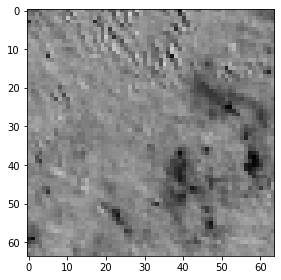

In [55]:
io.imshow(Xtrain_tf[2].reshape(64,64),cmap='gray')
preds = tf.argmax(predictions[2])
tf.print(preds)

0


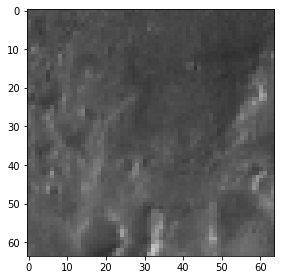

In [56]:
io.imshow(Xtrain_tf[1].reshape(64,64),cmap='gray')
preds = tf.argmax(predictions[1])
tf.print(preds)

1


/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


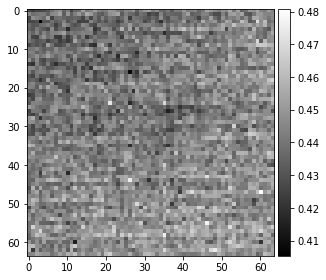

In [57]:
io.imshow(Xtrain_tf[0].reshape(64,64),cmap='gray')
preds = tf.argmax(predictions[0])
tf.print(preds)